In [1]:
!mkdir medical_insurance_app


In [2]:
!ls


medical_insurance_app  sample_data


In [3]:
%cd medical_insurance_app


/content/medical_insurance_app


In [4]:
%cd medical_insurance_app


[Errno 2] No such file or directory: 'medical_insurance_app'
/content/medical_insurance_app


In [5]:
!pwd


/content/medical_insurance_app


In [7]:
!ls


In [9]:
import pandas as pd

data = pd.read_csv("insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.shape
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


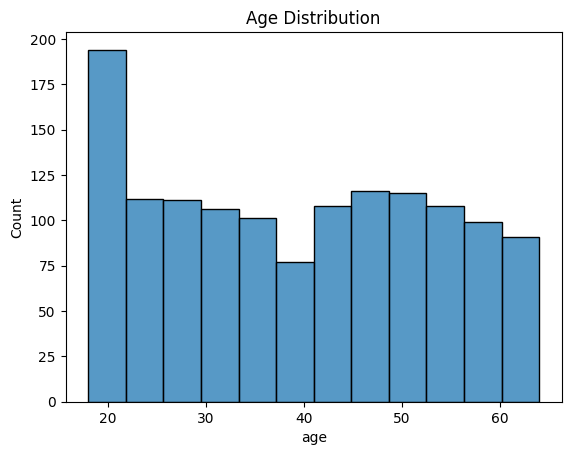

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['age'])
plt.title("Age Distribution")
plt.show()


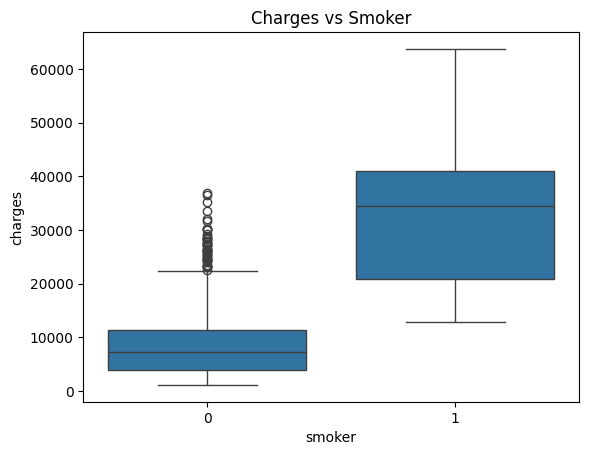

In [17]:
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Charges vs Smoker")
plt.show()


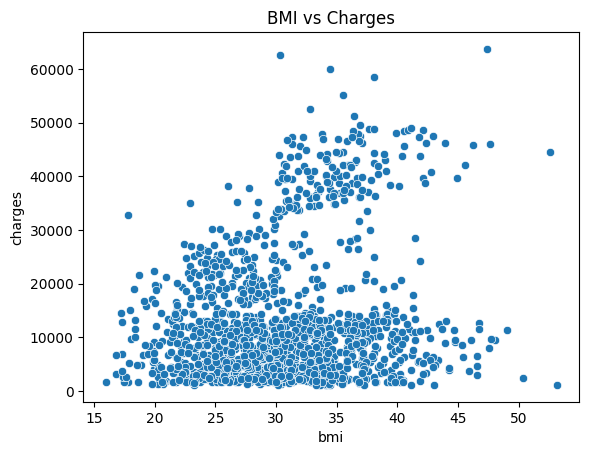

In [18]:
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title("BMI vs Charges")
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['sex'] = encoder.fit_transform(data['sex'])      # male=1, female=0
data['smoker'] = encoder.fit_transform(data['smoker'])  # yes=1, no=0
data['region'] = encoder.fit_transform(data['region'])  # NE=0, NW=1, SE=2, SW=3

data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
from sklearn.model_selection import train_test_split

X = data.drop("charges", axis=1)
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
from sklearn import metrics

y_pred = model.predict(X_test)
metrics.r2_score(y_test, y_pred)


0.8642606273649586

In [23]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [27]:
%%writefile app.py
`import streamlit as st
import numpy as np
import pickle

st.set_page_config(page_title="Medical Insurance Cost Prediction")

# Load trained model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("Medical Insurance Cost Prediction")
st.write("Enter the details below to predict insurance cost.")

age = st.slider("Age", 18, 100, 25)
bmi = st.slider("BMI", 10.0, 50.0, 25.0)
children = st.number_input("Number of Children", 0, 10, 0)

sex = st.selectbox("Sex", ["Female", "Male"])
smoker = st.selectbox("Smoker", ["No", "Yes"])
region = st.selectbox(
    "Region",
    ["Northeast", "Northwest", "Southeast", "Southwest"]
)

# Encoding (must match training)
sex = 1 if sex == "Male" else 0
smoker = 1 if smoker == "Yes" else 0

region_map = {
    "Northeast": 0,
    "Northwest": 1,
    "Southeast": 2,
    "Southwest": 3
}
region = region_map[region]

if st.button("Predict Insurance Cost"):
    input_data = np.array([[age, sex, bmi, children, smoker, region]])
    prediction = model.predict(input_data)
    st.success(f"Estimated Insurance Cost: ₹ {prediction[0]:.2f}")
`


Overwriting app.py


In [28]:
!ls


app.py	insurance.csv  model.pkl


In [29]:
%%writefile requirements.txt
streamlit
numpy
pandas
scikit-learn


Writing requirements.txt


In [30]:
!ls


app.py	insurance.csv  model.pkl  requirements.txt
